In [5]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


📊 Logistic Regression Metrics:
Precision: 0.061016949152542375
Recall: 0.9183673469387755
F1-Score: 0.11443102352193261

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55479  1385]
 [    8    90]]
--------------------------------------------------
📊 Random Forest Metrics:
Precision: 0.9605263157894737
Recall: 0.7448979591836735
F1-Score: 0.8390804597701149

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       

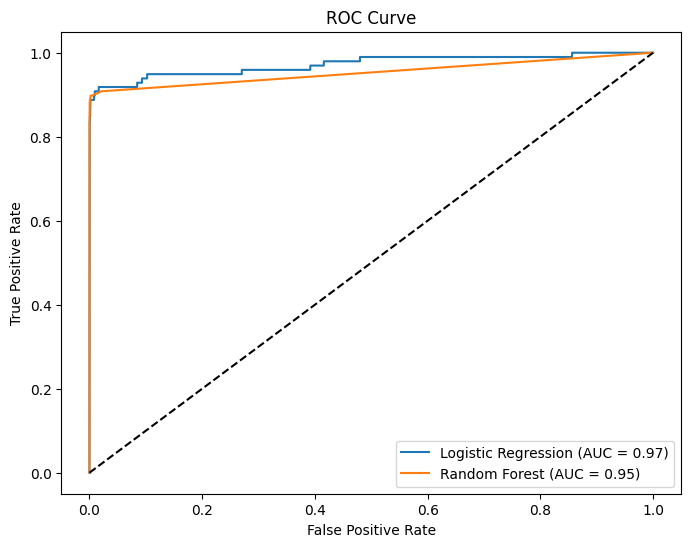

In [6]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load Original Dataset ---
data = pd.read_csv("creditcard.csv")

# --- Step 3: Split Features and Target ---
X = data.drop(columns=["Class"])
y = data["Class"]

# --- Step 4: Train/Test Split (Stratify to maintain class balance) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 5: Train Logistic Regression ---
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
log_model.fit(X_train, y_train)

# --- Step 6: Train Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# --- Step 7: Predictions ---
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# --- Step 8: Evaluate Metrics ---
def print_metrics(y_true, y_pred, model_name):
    print(f"📊 {model_name} Metrics:")
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-"*50)

print_metrics(y_test, y_pred_log, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")

# --- Step 9: Plot ROC Curves ---
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



 Reflection: Most Important Metric for Credit Card Fraud Detection

In credit card fraud detection, the dataset is highly imbalanced: the number of legitimate transactions (Class 0) is much higher than fraudulent transactions (Class 1).

Metrics to consider:
1. Accuracy – Can be misleading due to class imbalance.
2. Precision – Measures how many predicted frauds are actual fraud.
3. Recall (Sensitivity) – Measures how many actual frauds are correctly detected.
4. F1 Score – Harmonic mean of precision and recall.
5. ROC-AUC – Measures model’s ability to distinguish classes.

Conclusion:
Recall is the most important metric for this project because missing fraudulent transactions (false negatives) can lead to financial loss. F1 score is a secondary metric to balance recall with precision.
